In [1]:
%matplotlib inline

In [2]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
sfiles = glob('../data/safe_stopcodes/*')
len(sfiles)

40

In [13]:
rnames = [fl[:-4].split('/')[-1].split('_')[0] for fl in sfiles]
rnames = [nm[:-1] if 'D' in nm or 'A' in nm else nm for nm in rnames]

In [14]:
rnames = sorted(rnames, key=lambda ent: int(ent[1:]))

In [18]:
unq = {}
for nm in rnames:
#     unq[nm] = True
    print(nm)

M2
M2
M3
M3
M4
M7
M8
M8
M9
M10
M10
M11
M11
M14
M14
M20
M21
M21
M22
M31
M35
M50
M50
M57
M66
M66
M96
M98
M98
M100
M100
M101
M102
M103
M104
M104
M106
M106
M116
M116


In [4]:
polylogs = glob('../data/scraped/*.log')
len(polylogs)

27

NYCT_M2 666 19
NYCT_M10 452 2
NYCT_M11 610 8
NYCT_M116 149 2
NYCT_M103 571 4
NYCT_M21 212 2
NYCT_M9 414 2
NYCT_M106 171 2
NYCT_M57 175 4
NYCT_M104 387 2
NYCT_M101 971 61
NYCT_M102 513 3
NYCT_M7 512 2
NYCT_M20 544 5
NYCT_M14A 254 5
NYCT_M31 241 4
NYCT_M66 148 3
NYCT_M1 631 35
NYCT_M100 560 3
NYCT_M50 151 2
NYCT_M4 485 9
NYCT_M98 481 2
NYCT_M5 701 18
NYCT_M96 159 3
NYCT_M35 264 2
NYCT_M8 135 2
NYCT_M3 664 7


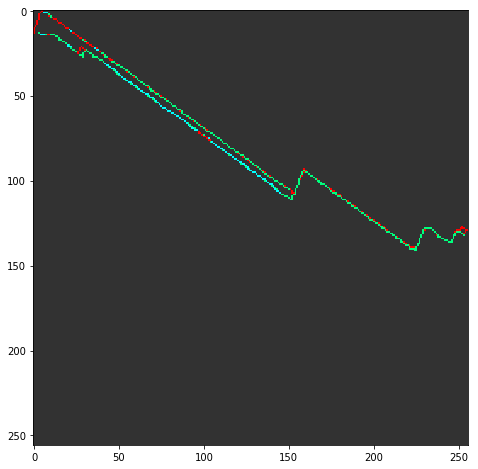

In [5]:
def brange(bat):
    xs = []
    ys = []
    for group in bat:
        for lat, lng in group:
            xs.append(lat)
            ys.append(lng)
    x0 = np.min(xs)
    y0 = np.min(ys)
    
    scale = max(np.max(xs) - np.min(xs), np.max(ys) - np.min(ys))
    
    return x0, y0, scale
        
all_polys = []
for fname in polylogs:
    with open(fname) as fl:
        lines = fl.read().split('\n')
    
    
    polys = []
#     bat = []
    bat = None
    route = None
    for ii, ln in enumerate(lines):
        if 'START' in ln:
            bat = []
            if route is None:
                route = ln.split()[-1]
            else:
                # check no log files were concatenated
                assert ln.split()[-1] == route
        elif 'END' in ln:
            polys.append(bat)
            bat = None
        elif bat is not None:
            lat, lng = ln.split(':')[1].split()[1:]
            bat.append((float(lat), float(lng)))
    print(route, len(lines), len(polys))
    all_polys.append(polys)
#     print()

def draw_polys(polys, res=256):
    clrs = [
        (255, 0, 0),
        (0, 255, 125),
        (0, 255, 255),
    ]
    x0, y0, scale = brange(polys)
    canvas = np.zeros((res, res, 3)).astype(np.uint8)
    canvas[:] = 50
    for gi, group in enumerate(polys):
#         print('  g', len(group))
        pts = np.array(group) - [x0, y0]
        pts /= scale
        pts *= (res - 1)
        pts = pts.reshape((len(pts),1,2)).astype(int)
        cv2.polylines(canvas, [pts], False, clrs[gi % len(clrs)], res//256)
    plt.figure(figsize=(8, 8))
    plt.imshow(canvas)
    plt.show()

draw_polys(all_polys[0])

In [11]:
flat = []
for polys in all_polys:
    for group in polys:
        for lat, lng in group:
            flat.append([lat, lng])
flat = np.array(flat)
flat.shape

(10728, 2)

In [13]:
np.mean(flat, axis=0)

array([ 40.78175269, -73.96522605])

In [7]:
bygroup = []
for polys in all_polys:
    for group in polys:
        bygroup.append(group)
    

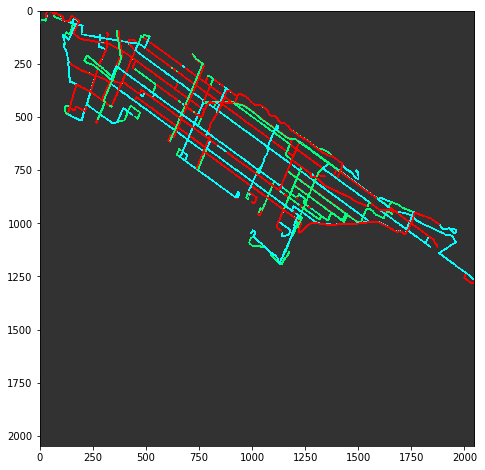

In [8]:
draw_polys(bygroup, res=2048)